In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [4]:
amzn_sp500_df = pd.read_csv(
    Path("amzn_sp500_data.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

In [6]:
daily_returns = amzn_sp500_df.pct_change().dropna()
daily_returns.head()

,AMZN,S&P 500
date,,
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988
2014-05-28,-0.002123,-0.001114


<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='date'>

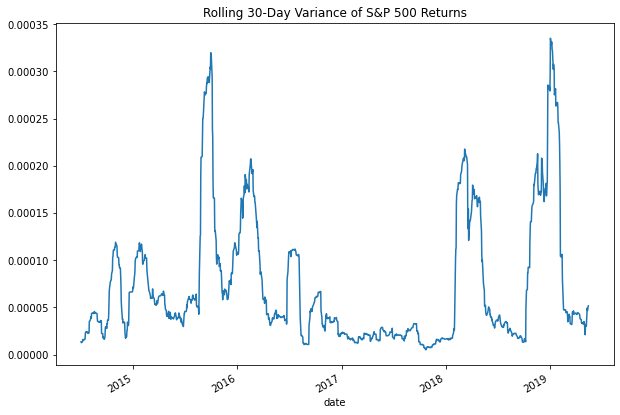

In [7]:
# Calculate the rolling 30 day variance of the S&P 500 (the market)
market_rolling_30_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Create the plot for the S&P 30 day rolling variance
market_rolling_30_variance.plot(
    figsize=(10, 7),
    title='Rolling 30-Day Variance of S&P 500 Returns'
)

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns'}, xlabel='date'>

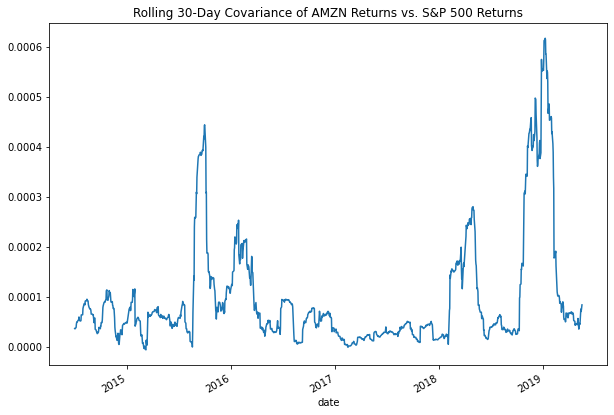

In [8]:
# Calculate the rolling 30-day covariance between AMZN and the S&P 500 (the market)
amzn_rolling_30_covariance = daily_returns['AMZN'].rolling(window=30).cov(daily_returns['S&P 500'].rolling(window=30))

# Create the plot for AMZN’s 30-day rolling covariance
amzn_rolling_30_covariance.plot(
    figsize=(10, 7),
    title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns'
)

<AxesSubplot:title={'center':'AMZN - Rolling 30-Day Beta'}, xlabel='date'>

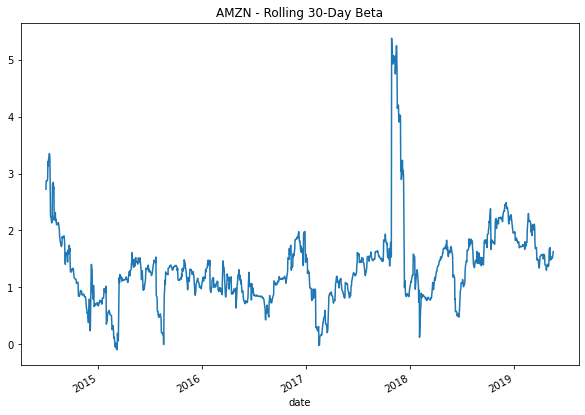

In [9]:
# Calculate the rolling beta by dividing AMZN’s 30-day rolling covariance
# by the 30-day rolling variance of the market
amzn_rolling_30_beta = amzn_rolling_30_covariance / market_rolling_30_variance

# Create the plot for AMZN’s 30-day rolling beta
amzn_rolling_30_beta.plot(
    figsize=(10, 7),
    title='AMZN - Rolling 30-Day Beta'
)